# NWA: Business Analytics

## 1) Basket segmentation

* First off, we commence by reading the necessary files (pos data, loyalty data, categories & barcodes).

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

header_df = pd.read_csv('pos.csv', sep=";", nrows=0)
data_types = {header: np.str for header in header_df.columns.tolist()}
data_types['Sum_Value'] = np.float
data_types['Sum_Units'] = np.int
data = pd.read_csv('pos.csv', sep=";", skiprows=1, names=header_df.columns.tolist(), 
                     dtype=data_types, decimal=',')
data.head(5)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9160003751260
1,1103853519,41381,520139501183,1,5.349993,9164001986624
2,1092750793,41346,520423907421,6,1.740015,9164012915385
3,1106160983,41388,211069400000,1,0.749817,9162005811409
4,1108695491,41395,520286400380,2,0.600000,9161003517351


In [2]:
header2_df = pd.read_csv('loyalty.csv', sep=";", nrows=0)
data_types2 = {header: np.str for header in header2_df.columns.tolist()}
loyalty = pd.read_csv('loyalty.csv', sep=";", skiprows=1, names=header2_df.columns.tolist(), 
                    dtype=data_types2)
loyalty = loyalty.rename(columns={'CardholderID': 'Card_ID'})
loyalty.head(5)

,Card_ID,Age,Sex,MaritalStatus,HouseholdSize,Children
0,9162002273446,51,Male,Single (Alone),1,0
1,9164011076155,72,Female,NaN,2,0
2,9162001049684,60,Female,NaN,1,0
3,9162005608405,NaN,Female,Married,5,NaN
4,9163002257856,50,Female,NaN,1,0


In [3]:
header3_df = pd.read_csv('barcodes.csv', sep=";", nrows=0)
data_types3 = {header: np.str for header in header3_df.columns.tolist()}

barcodes = pd.read_csv('barcodes.csv', sep=";", skiprows=1, names=header3_df.columns.tolist(), 
                     dtype=data_types3)
barcodes.head(5)

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1


In [4]:
header4_df = pd.read_csv('categories.csv', sep=";", nrows=0)
data_types4 = {header: np.str for header in header4_df.columns.tolist()}

categories = pd.read_csv('categories.csv', sep=";", skiprows=1, names=header4_df.columns.tolist(), 
                     dtype=data_types4)
categories.head(5)

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,ΠΟΤΑ,261,ΑΝΑΨΥΚΤΙΚΑ,1,ΚΟΛΑ
1,10,11,ΠΟΤΑ,261,ΑΝΑΨΥΚΤΙΚΑ,2,ΓΚΑΖΟΖΑ & LIME
2,10,11,ΠΟΤΑ,261,ΑΝΑΨΥΚΤΙΚΑ,3,ΔΙΑΦΟΡΑ ΑΝΑΨΥΚΤΙΚΑ
3,10,11,ΠΟΤΑ,261,ΑΝΑΨΥΚΤΙΚΑ,4,ΠΑΙΔΙΚΑ ΑΝΑΨΥΚΤΙΚΑ
4,10,11,ΠΟΤΑ,261,ΑΝΑΨΥΚΤΙΚΑ,5,ΡΟΦΗΜΑΤΑ ΦΡΟΥΤΩΝ


* At this point, it is wise to remove every record that refers to a refund (i.e. rows that have a negative amount of Sum Units).

In [5]:
data = data[data.Sum_Units > 0].copy()

* Here comes the juicy part. We need to find a way to merge (or vlookup if you wish so) the categories to the barcodes dataframe. This is done through the creation of a compound key (a string that consists of the category code of each level).

In [6]:
categories['Compound_Key'] = categories['CategoryA'].map(str) + categories['CategoryB'].map(str) + categories['CategoryC'].map(str) + categories['CategoryD'].map(str)
barcodes['Compound_Key'] = barcodes['CategoryA'].map(str) + barcodes['CategoryB'].map(str) + barcodes['CategoryC'].map(str) + barcodes['CategoryD'].map(str)

barcodes = pd.merge(barcodes, 
                    categories[['CategoryBDescription', 'CategoryCDescription','CategoryDDescription', 'Compound_Key']],
                    on = 'Compound_Key',
                    how = 'inner')


* Then, we merge the categories' descriptions back to the pos data.

In [7]:
data = pd.merge(data, 
                barcodes[['CategoryBDescription', 'CategoryCDescription','CategoryDDescription', 'Barcode']],
                on = 'Barcode',
                how = 'inner')

data['clustering_category'] = data['CategoryCDescription'].map(str) + ' > ' + data['CategoryDDescription'].map(str)
data.head(5)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryBDescription,CategoryCDescription,CategoryDDescription,clustering_category
0,1103084867,41379,800220505783,2,1.960000,9160003751260,ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ,ΖΩΟΤΡΟΦΕΣ,ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ,ΖΩΟΤΡΟΦΕΣ > ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ
1,1098000980,41363,800220505783,2,1.960000,9160001242098,ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ,ΖΩΟΤΡΟΦΕΣ,ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ,ΖΩΟΤΡΟΦΕΣ > ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ
2,1101855276,41375,800220505783,1,0.980015,9163002314061,ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ,ΖΩΟΤΡΟΦΕΣ,ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ,ΖΩΟΤΡΟΦΕΣ > ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ
3,1104210367,41382,800220505783,3,2.940015,9164013170684,ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ,ΖΩΟΤΡΟΦΕΣ,ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ,ΖΩΟΤΡΟΦΕΣ > ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ
4,1097159868,41361,800220505783,1,0.980015,9164013172312,ΠΑΝΤΟΠΩΛΕΙΟ ΤΡΟΦΙΜΑ,ΖΩΟΤΡΟΦΕΣ,ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ,ΖΩΟΤΡΟΦΕΣ > ΥΓΡΗ ΤΡΟΦΗ ΓΑΤΑΣ


* Before proceeding to clustering, we might need to remove any outliers. Let's create a boxplot for this reason!

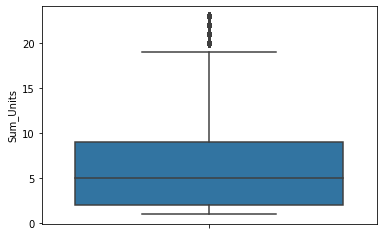

In [8]:
import seaborn as sns

sns.boxplot(y="Sum_Units", data=data.groupby('Basket_ID').agg({'Sum_Units': 'sum'}))

In [9]:
Q1 = data.groupby('Basket_ID')['Sum_Units'].transform('sum').quantile(0.25)
Q3 = data.groupby('Basket_ID')['Sum_Units'].transform('sum').quantile(0.75)

IQR = Q3 - Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR


* Let's see the minimum and the maximum to check if it makes sense!

In [10]:
minimum, maximum

(-8.5, 27.5)

* In our case we can see that a negative amount of Units in a basket does not make sense. Therefore, we'll set this value to 2.5 (and thus, accept a minimum of 3 units per basket in our analysis).

In [11]:
minimum = 2.5

In [12]:
grouped = data.groupby('Basket_ID')['Sum_Units'].transform('sum')
ids = grouped[grouped.between(minimum, maximum)].index.get_level_values(0)

In [13]:
data = data[data.index.isin(ids)].copy()

* Now that we have removed any outliers we will create a pivot table, using the unique Basket_IDs as rows and the unique values of Category C as columns.

In [14]:
clustering_input = data.pivot_table(values='Sum_Units',
                                    index='Basket_ID',
                                    columns='clustering_category',
                                    fill_value=0,
                                    aggfunc='sum')
clustering_input.head(5)

clustering_category,4η ΓΚΑΜΑ > ΣΑΛΑΤΕΣ ΕΤΟΙΜΕΣ,5η ΓΚΑΜΑ > ΠΡΟΒΡΑΣΜΕΝΑ ΛΑΧΑΝΙΚΑ,AIR TIME COSMOTE > AIR TIME COSMOTE,AIR TIME Q > AIR TIME Q,AIR TIME VODAFONE > AIR TIME VODAFONE,AIR TIME WIND > AIR TIME WIND,CAMPING > ΚΟΥΖΙΝΑ & ΦΩΤΙΣΜΟΣ,SPORT ΕΞΩΤΕΡΙΚΟΥ ΧΩΡΟΥ > BOOMERANG,ΑΘΛΗΤΙΚΑ ΑΝΔΡΙΚΑ > ΑΛΛΑ ΑΘΛΗΜΑΤΑ,ΑΘΛΗΤΙΚΑ ΑΝΔΡΙΚΑ > ΣΤΙΒΟΥ,ΑΘΛΗΤΙΚΑ ΓΥΝΑΙΚΕΙΑ 36-41 > ΑΛΛΑ ΑΘΛΗΜΑΤΑ,ΑΘΛΗΤΙΚΑ ΓΥΝΑΙΚΕΙΑ 36-41 > ΤΕΝΝΙΣ,ΑΘΛΗΤΙΚΑ ΠΑΙΔΙΚΑ 28-38 > ΣΤΙΒΟΥ,ΑΘΛΗΤΙΚΑ ΠΑΙΔΙΚΑ 28-38 > ΤΕΝΝΙΣ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΑΛΑΤΙ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΒΟΤΑΝΑ ΚΑΙ ΑΡΩΜΑΤΙΚΑ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΓΑΡΥΦΑΛΛΟ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΔΙΑΦΟΡΑ ΜΠΑΧΑΡΙΚΑ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΚΑΝΕΛΛΑ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΠΙΠΕΡΙ,ΑΛΕΙΦΩΔΗΣ ΥΛΗ ΓΙΑ ΕΠΑΛΕΙΨ > ΑΛΑΤΙΣΜΕΝΟ,ΑΛΕΙΦΩΔΗΣ ΥΛΗ ΓΙΑ ΕΠΑΛΕΙΨ > ΑΝΑΛΑΤΟ,ΑΛΕΙΦΩΔΗΣ ΥΛΗ ΓΙΑ ΕΠΑΛΕΙΨ > ΧΑΜΗΛΑ ΛΙΠΑΡΑ,ΑΛΕΥΡΙ > ΑΛΕΥΡΙ ΣΚΛΗΡΟ / ΜΑΛΑΚΟ,ΑΛΕΥΡΙ > ΔΙΑΦΟΡΑ,ΑΛΕΥΡΙ > ΕΙΔΙΚΟ,ΑΛΕΥΡΙ > ΟΛΩΝ ΤΩΝ ΧΡΗΣΕΩΝ,ΑΛΕΥΡΙ > ΣΥΜΙΓΔΑΛΙ,ΑΛΕΥΡΙ > ΦΑΡΙΝΕΣ,ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ > COGNAC-BRANDY,ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ > ΛΙΚΕΡ,ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ > ΡΟΥΜΙ,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > GIN,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > RTDS,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > VODKA,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > WHISKY,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΑΡΑΒΙΚΕΣ ΠΙΤΤΕΣ,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΚΡΙΤΣΙΝΙΑ,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΑΞΙΜΑΔΙΑ,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΙΤΤΕΣ ΓΙΑ ΣΟΥΒΛΑΚΙ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΔΙΑΦΟΡΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΖΑΜΠΟΝ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΛΟΥΚΑΝΙΚΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΜΟΡΤΑΔΕΛΛΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΜΠΕΙΚΟΝ ΜΠΡΙΖΟΛΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΑΡΙΖΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΛΑΤΗ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΟΥΛΕΡΙΚΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΡΟΣΥΣΚΕΥΑΣΜΕΝΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΣΑΛΑΜΙΑ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΕΝΤΕΡΟ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΛΟΥΚΑΝΙΚΑ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΣΑΛΑΜΙΑ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΦΕΤΕΣ,ΑΝΑΨΥΚΤΙΚΑ > ΓΚΑΖΟΖΑ & LIME,ΑΝΑΨΥΚΤΙΚΑ > ΔΙΑΦΟΡΑ ΑΝΑΨΥΚΤΙΚΑ,ΑΝΑΨΥΚΤΙΚΑ > ΚΑΦΕ,ΑΝΑΨΥΚΤΙΚΑ > ΚΟΛΑ,ΑΝΑΨΥΚΤΙΚΑ > ΝΕΚΤΑΡ&ΒΑΣΗ ΣΥΜΠΥΚΝΩΜΕΝΟΙ,ΑΝΑΨΥΚΤΙΚΑ > ΡΟΦΗΜΑΤΑ ΦΡΟΥΤΩΝ,ΑΝΑΨΥΚΤΙΚΑ > ΣΙΡΟΠΙΑ&ΣΥΜΠΥΚΝΩΜΕΝΟΙ,ΑΝΑΨΥΚΤΙΚΑ > ΤΟΝΩΤΙΚΑ ΑΝΑΨΥΚΤΙΚΑ,ΑΝΑΨΥΚΤΙΚΑ > ΤΣΑΙ,ΑΝΑΨΥΚΤΙΚΑ > ΦΥΣΙΚΟΙ ΧΥΜΟΙ,ΑΝΑΨΥΚΤΙΚΑ > ΧΥΜΟΙ ΔΙΑΙΤ/ΚΟΙ-ΛΑΧΑΝΙΚΩΝ,ΑΝΤΑΛΛΑΚΤΙΚΑ > ΔΙΑΦΟΡΑ,ΑΝΤΑΛΛΑΚΤΙΚΑ > ΣΑΚΟΥΛΕΣ,ΑΝΤΑΛΛΑΚΤΙΚΑ > ΦΙΛΤΡΑ,ΑΞΕΣΟΥΑΡ ΓΡΑΦΕΙΟΥ ΤΑΞΙΝΟΜ > ΑΞΕΣΟΥΑΡ ΓΡΑΦΕΙΟΥ,ΑΞΕΣΟΥΑΡ ΓΡΑΦΕΙΟΥ ΤΑΞΙΝΟΜ > ΤΑΞΙΝΟΜΗΣΗ,ΑΞΕΣΟΥΑΡ ΠΑΠΟΥΤΣΙΩΝ > ΚΟΡΔΟΝΙΑ,ΑΞΕΣΟΥΑΡ ΠΑΠΟΥΤΣΙΩΝ > ΠΑΤΟΙ,ΑΞΕΣΟΥΑΡ ΠΑΡΟΥΣΙΑΣΗΣ DECO > ΠΕΤΡΙΝΕΣ ΚΑΤΑΣΚΕΥΕΣ&ΑΛΛΑ,ΑΞΕΣΟΥΑΡ ΠΑΡΟΥΣΙΑΣΗΣ DECO > ΠΙΑΤΑ ΓΛΑΣΤΡΑΣ,ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΑΞΕΣ ΤΑΚΤΟΠ ΕΝΔΥΣ+ΥΠΟΔΥΣ,"ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΑΠΛΩΣΤΡΕΣ,ΜΑΝΤΑΛΑΚΙΑ","ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΚΑΛΑΘΙΑ,ΛΕΚΑΝΕΣ ΡΟΥΧΩΝ",ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΚΡΕΜΑΣΤΡΕΣ,ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΣΙΔΕΡΩΣΤΡΕΣ-ΣΙΔΕΡΟΠΑΝΑ,ΑΞΕΣΟΥΑΡ ΤΗΛΕΟΡΑΣ &ΒΙΝΤΕΟ > ΚΑΛΩΔΙΩΣΕΙΣ,ΑΠΕΡΙΤΙΦ > ΑΠΕΡΙΤΙΦ BITTER ΧΩΝΕΥΤΙΚΑ,ΑΠΕΡΙΤΙΦ > ΒΕΡΜΟΥΤ,ΑΠΕΡΙΤΙΦ > ΚΟΚΤΕΙΛ,ΑΠΕΡΙΤΙΦ > ΟΥΖΟ,ΑΠΕΡΙΤΙΦ > ΤΣΙΠΟΥΡΟ-ΤΣΙΚΟΥΔΙΑ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΑΠΟΣΜΗΤΙΚΑ ΧΩΡΟΥ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΒΕΡΝΙΚΙΑ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΕΙΔΗ ΣΥΣΚΕΥΑΣΙΑΣ ΝΟΙΚΟΚΥΡ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΕΝΤΟΜΟΚΤΟΝΑ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΠΡΟΙΟΝΤΑ ΑΝΑΜΜΑΤΟΣ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΣΦΟΥΓΓΑΡ-ΠΕΤΣΕΤΕΣ-ΣΥΡΜΑΤΑ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΑΠΟΡΡΥΠΑΝΤΙΚΑ ΡΟΥΧΩΝ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΜΑΛΑΚΤΙΚΑ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΠΕΡΙΠΟΙΗΣΗ ΡΟΥΧΩΝ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΣΑΠΟΥΝΙΑ ΝΟΙΚΟΚΥΡΙΟΥ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΣΥΝΤΗΡΗΣΗ ΠΛΥΝΤΗΡΙΟΥ,ΑΡΝΙ > ΚΕΦΑΛΙ,ΑΡΝΙ > ΟΛΟΚΛΗΡΟ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΚΡΟΥΤΟΝ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΑΞΙΜΑΔΙΑ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΑΞΙΜΑΔΙΑ ΣΟΥΗΔΙΚΟΥ ΤΥΠΟΥ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΣΝΑΚΣ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΦΡΥΓΑΝΙΕΣ - ΠΑΡΑΓΩΓΑ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΣΤΕΓΝΗ ΖΑΧΑΡ > COOKIES,ΑΤΟΜΙΚ ΜΕΡΙΔ ΣΤΕΓΝΗ ΖΑΧΑΡ > ΚΟΥΛΟΥΡΙΑ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΣΤΕΓΝΗ ΖΑΧΑΡ > ΠΤΙ ΦΟΥΡ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΦΡΕΣΚ ΖΑΧΑΡ > ΑΛΛΑ ΚΕΡΑΣΜΑΤΑ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΦΡΕΣΚ ΖΑΧΑΡ > ΕΚΛΕΡ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΦΡΕΣΚ ΖΑΧΑΡ > ΛΟΥΚΟΥΜΙΑ,ΑΤΟΜΙΚΑ > ΑΤΟΜΙΚΑ,ΑΤΟΜΙΚΑ > ΠΟΛΥΣΥΣΚΕΥΑΣΙΕΣ,ΑΥΓΑ > ΑΧΥΡΩΝΑ,ΑΥΓΑ > ΒΑΜΜΕΝΑ,ΑΥΓΑ > ΕΙΔΙΚΑ,ΑΥΓΑ > ΕΛΕΥΘΕΡΑΣ ΒΟΣΚΗΣ,ΑΥΓΑ > ΗΜΕΡΑΣ,ΑΥΓΑ > ΦΡΕΣΚΑ,ΒΙΟΛΟΓΙΚΑ > ΑΥΓΑ,ΒΙΟΛΟΓΙΚΑ > ΒΟΥΤΥΡΑ - ΑΛΕΙΦΩΔΗΣ ΥΛΗ,ΒΙΟΛΟΓΙΚΑ > ΓΑΛΑ ΦΡΕΣΚΟ,ΒΙΟΛΟΓΙΚΑ > ΓΙΑΟΥΡΤΙ,ΒΙΟΛΟΓΙΚΑ > ΛΑΧΑΝΙΚΑ,ΒΙΟΛΟΓΙΚΑ > ΜΑΡΓΑΡΙΝΕΣ,ΒΙΟΛΟΓΙΚΑ > ΠΑΙΔΙΚΑ ΠΡΟΙΟΝΤΑ,ΒΙΟΛΟΓΙΚΑ > ΤΥΠΟΠΟΙΗΜΕΝΑ ΤΥΡΙΑ,ΒΟΗΘΗΜΑΤΑ ΜΑΓΕΙΡΙΚΗΣ > ΑΡΩΜΑΤΙΚΑ ΦΥΤΑ,ΒΟΥΤΥΡΑ > ΑΛΟΥΜΙΝΟΧΑΡΤΟ,ΒΟΥΤΥΡΑ > ΠΑΡΑΔΟΣΙΑΚΟ,Β

* Going on, we will use the Elbow method to decide the appropriate amount of clusters needed!

C:\Users\Theodosis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


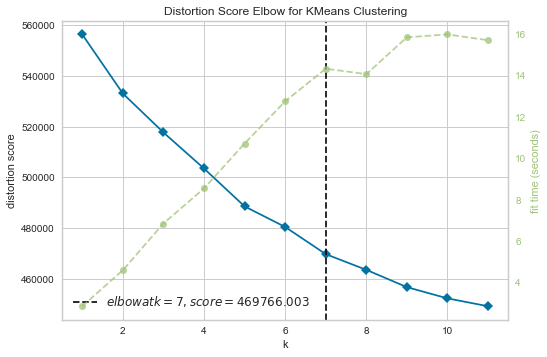

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1, 12))

visualizer.fit(clustering_input)
visualizer.show()

* As we can see the appropriate amount of basket clusters is 7 according to the above method.
* The next step, is to export the dataframe (clustering_input) to a CSV, which will be fed to Rapid Miner.

In [16]:
clustering_input.to_csv('clustering_input.csv')

* _The method of CosineSimilarity was chosen in order to identify common patterns among the baskets._
* _Other methods that we tried were, of coure, the Euclidian Distance as well as the Jaccard Similarity (after converting the data to binary)._
* We concluded, though, that the Cosine Similarity method guaranteed the best results, as the clusters could be easier interpreted and made more sense as far as human reasoning and understanding are concerned.
* After completing the clustering with the assistance of Rapid Miner, we read the data back from a CSV. 


### Basket clusters presentation

In [17]:
result = pd.read_csv('clustering_result.csv', sep=';', index_col='Basket_ID')
result.iloc[:, -1].tail(5)

Basket_ID
1109175669    cluster_1
1109175671    cluster_4
1109175672    cluster_6
1109175674    cluster_4
1109175675    cluster_4
Name: cluster, dtype: object

* We, now, need to name the basket segments that we identified above, because cluster_0, or cluster_n for that matter, are not meaningful names!

* Below, we plot each basket cluster. The percentage of each product category corresponds to the percentage of their appearance in every basket. In other words, a product category that has 100% percentage means that a product of this category appears in every basket of **this** segment.

<Figure size 576x396 with 0 Axes>

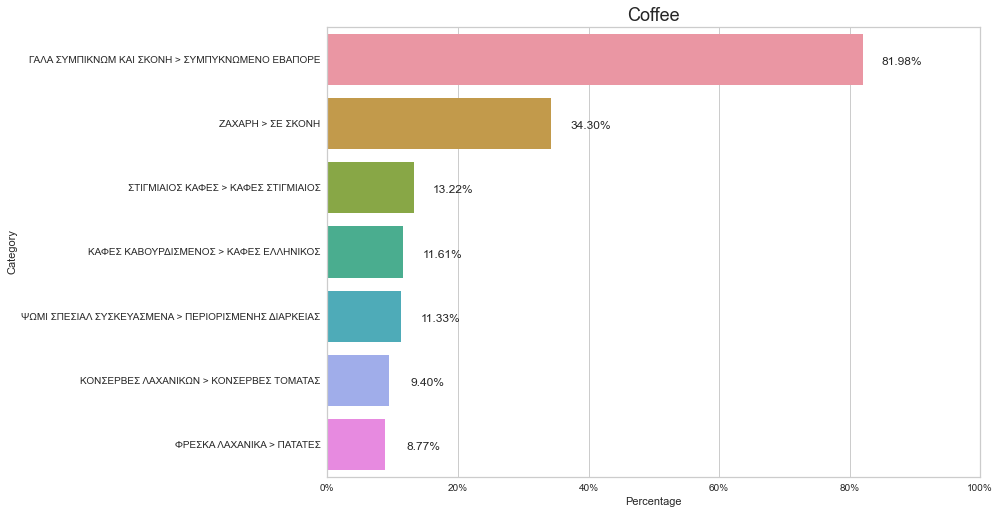

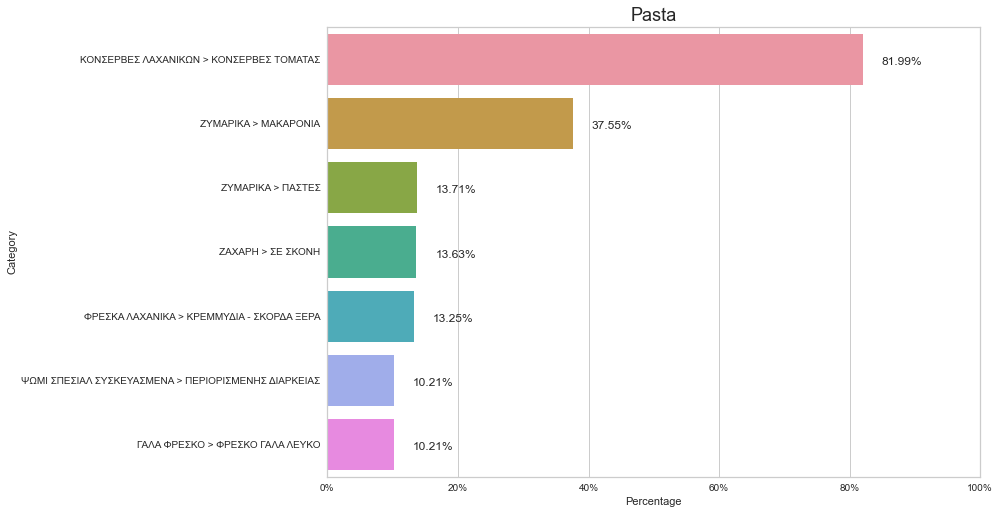

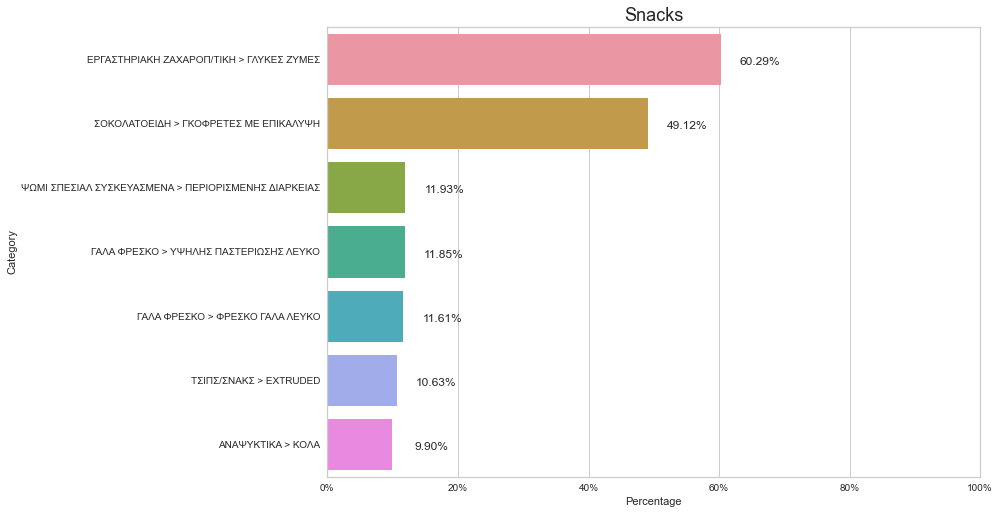

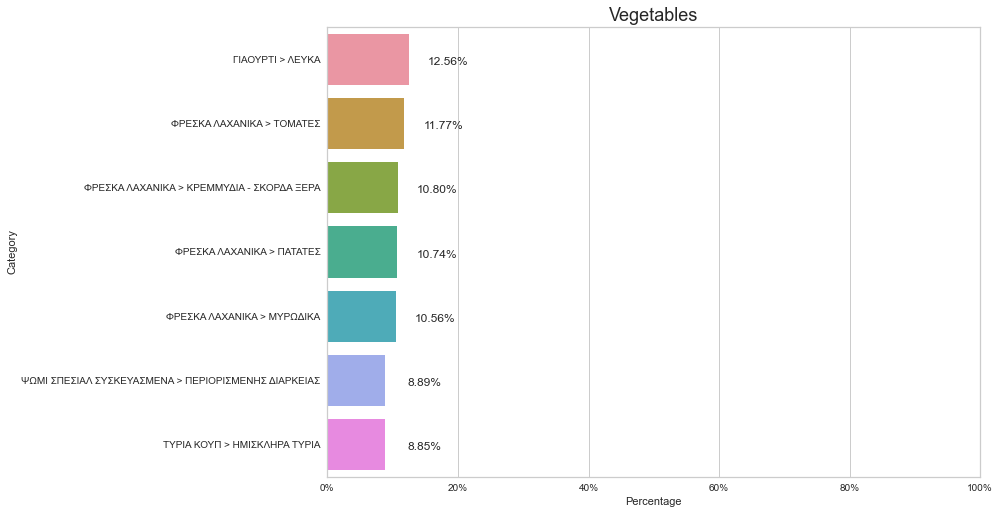

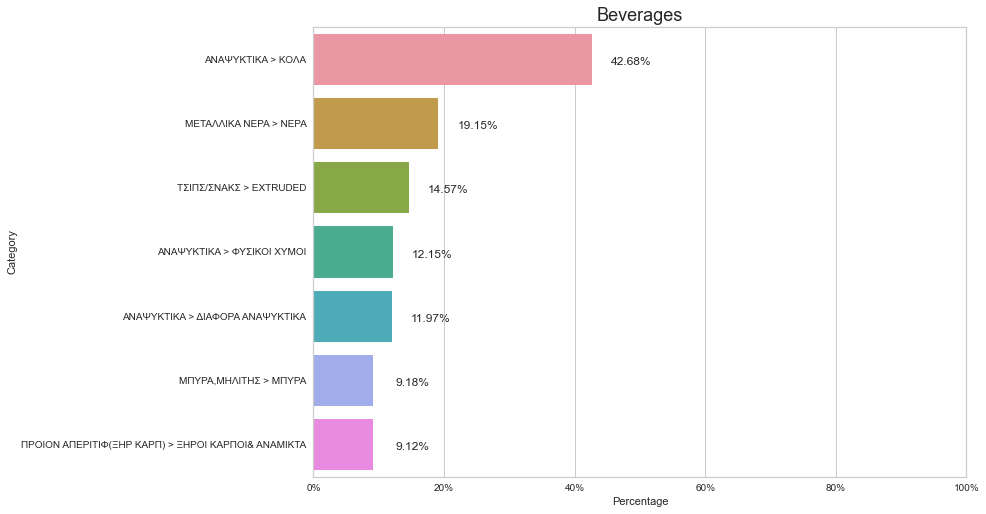

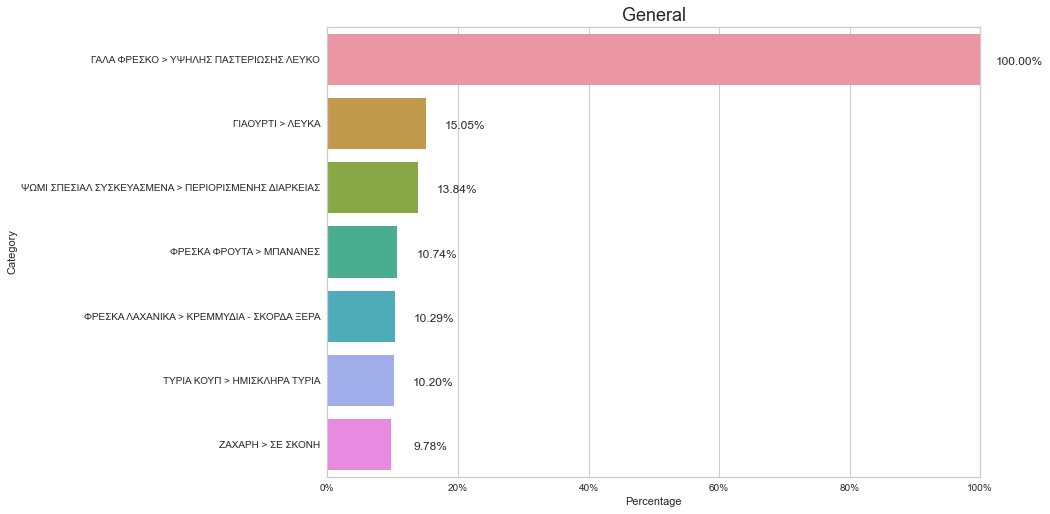

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

names_map = {
    1: 'Coffee',
    2: 'Pasta',
    3: 'Snacks',
    4: 'Vegetables',
    5: 'Beverages',
    6: 'General'
}

for i in range(1,7):
    cluster = result[result['cluster'] == 'cluster_' + str(i)].copy()
    del cluster['cluster']
    cluster[cluster > 1] = 1
    a =(cluster.sum(axis=0) / len(cluster.index)).sort_values(ascending = False).head(7) * 100
    df = pd.DataFrame(a, columns=['Percentage'])
    df.reset_index(level=0, inplace=True)
    df.rename(columns={'index': 'Category'}, inplace=True)
    plt.figure(i)
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax = sns.barplot(y='Category', x='Percentage', data=df)
    ax.set_title(names_map[i], fontsize=18)
    ax.set(xlim=(0, 100))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax.patches:
        width = p.get_width()
        plt.text(p.get_width()+6, p.get_y()+0.55*p.get_height(),'{:1.2f}'.format(width)+'%',ha='center', va='center')
    ax.figure.savefig(names_map[i].replace(' ', '_') + '.png', bbox_inches = "tight", dpi=145)

* The last cluster is called "General", because the appearance of "Garlic" prohibits us from calling it a "Breakfast" cluster. As far as we know, at least, none of us consume garlic as a part of their breakfast! 😜

In [19]:
result.reset_index(level=0, inplace=True)
result['Basket_ID'] = result['Basket_ID'].astype(str)

In [20]:
result

,Basket_ID,4η ΓΚΑΜΑ > ΣΑΛΑΤΕΣ ΕΤΟΙΜΕΣ,5η ΓΚΑΜΑ > ΠΡΟΒΡΑΣΜΕΝΑ ΛΑΧΑΝΙΚΑ,AIR TIME COSMOTE > AIR TIME COSMOTE,AIR TIME Q > AIR TIME Q,AIR TIME VODAFONE > AIR TIME VODAFONE,AIR TIME WIND > AIR TIME WIND,CAMPING > ΚΟΥΖΙΝΑ & ΦΩΤΙΣΜΟΣ,SPORT ΕΞΩΤΕΡΙΚΟΥ ΧΩΡΟΥ > BOOMERANG,ΑΘΛΗΤΙΚΑ ΑΝΔΡΙΚΑ > ΑΛΛΑ ΑΘΛΗΜΑΤΑ,ΑΘΛΗΤΙΚΑ ΑΝΔΡΙΚΑ > ΣΤΙΒΟΥ,ΑΘΛΗΤΙΚΑ ΓΥΝΑΙΚΕΙΑ 36-41 > ΑΛΛΑ ΑΘΛΗΜΑΤΑ,ΑΘΛΗΤΙΚΑ ΓΥΝΑΙΚΕΙΑ 36-41 > ΤΕΝΝΙΣ,ΑΘΛΗΤΙΚΑ ΠΑΙΔΙΚΑ 28-38 > ΣΤΙΒΟΥ,ΑΘΛΗΤΙΚΑ ΠΑΙΔΙΚΑ 28-38 > ΤΕΝΝΙΣ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΑΛΑΤΙ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΒΟΤΑΝΑ ΚΑΙ ΑΡΩΜΑΤΙΚΑ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΓΑΡΥΦΑΛΛΟ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΔΙΑΦΟΡΑ ΜΠΑΧΑΡΙΚΑ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΚΑΝΕΛΛΑ,ΑΛΑΤΙ - ΠΙΠΕΡΙ - ΜΠΑΧΑΡΙΚ > ΠΙΠΕΡΙ,ΑΛΕΙΦΩΔΗΣ ΥΛΗ ΓΙΑ ΕΠΑΛΕΙΨ > ΑΛΑΤΙΣΜΕΝΟ,ΑΛΕΙΦΩΔΗΣ ΥΛΗ ΓΙΑ ΕΠΑΛΕΙΨ > ΑΝΑΛΑΤΟ,ΑΛΕΙΦΩΔΗΣ ΥΛΗ ΓΙΑ ΕΠΑΛΕΙΨ > ΧΑΜΗΛΑ ΛΙΠΑΡΑ,ΑΛΕΥΡΙ > ΑΛΕΥΡΙ ΣΚΛΗΡΟ / ΜΑΛΑΚΟ,ΑΛΕΥΡΙ > ΔΙΑΦΟΡΑ,ΑΛΕΥΡΙ > ΕΙΔΙΚΟ,ΑΛΕΥΡΙ > ΟΛΩΝ ΤΩΝ ΧΡΗΣΕΩΝ,ΑΛΕΥΡΙ > ΣΥΜΙΓΔΑΛΙ,ΑΛΕΥΡΙ > ΦΑΡΙΝΕΣ,ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ > COGNAC-BRANDY,ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ > ΛΙΚΕΡ,ΑΛΚΟΟΛΟΥΧΑ ΠΟΤΑ > ΡΟΥΜΙ,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > GIN,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > RTDS,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > VODKA,ΑΛΚΟΟΛΟΥΧΑ ΣΙΤΗΡΩΝ > WHISKY,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΑΡΑΒΙΚΕΣ ΠΙΤΤΕΣ,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΚΡΙΤΣΙΝΙΑ,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΑΞΙΜΑΔΙΑ,ΑΛΛΑ ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΙΤΤΕΣ ΓΙΑ ΣΟΥΒΛΑΚΙ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΔΙΑΦΟΡΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΖΑΜΠΟΝ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΛΟΥΚΑΝΙΚΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΜΟΡΤΑΔΕΛΛΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΜΠΕΙΚΟΝ ΜΠΡΙΖΟΛΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΑΡΙΖΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΛΑΤΗ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΟΥΛΕΡΙΚΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΠΡΟΣΥΣΚΕΥΑΣΜΕΝΑ,ΑΛΛΑΝΤΙΚΑ ΚΟΥΠ > ΣΑΛΑΜΙΑ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΕΝΤΕΡΟ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΛΟΥΚΑΝΙΚΑ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΣΑΛΑΜΙΑ,ΑΛΛΑΝΤΙΚΑ ΣΥΣΚΕΥΑΣΜΕΝΑ > ΦΕΤΕΣ,ΑΝΑΨΥΚΤΙΚΑ > ΓΚΑΖΟΖΑ & LIME,ΑΝΑΨΥΚΤΙΚΑ > ΔΙΑΦΟΡΑ ΑΝΑΨΥΚΤΙΚΑ,ΑΝΑΨΥΚΤΙΚΑ > ΚΑΦΕ,ΑΝΑΨΥΚΤΙΚΑ > ΚΟΛΑ,ΑΝΑΨΥΚΤΙΚΑ > ΝΕΚΤΑΡ&ΒΑΣΗ ΣΥΜΠΥΚΝΩΜΕΝΟΙ,ΑΝΑΨΥΚΤΙΚΑ > ΡΟΦΗΜΑΤΑ ΦΡΟΥΤΩΝ,ΑΝΑΨΥΚΤΙΚΑ > ΣΙΡΟΠΙΑ&ΣΥΜΠΥΚΝΩΜΕΝΟΙ,ΑΝΑΨΥΚΤΙΚΑ > ΤΟΝΩΤΙΚΑ ΑΝΑΨΥΚΤΙΚΑ,ΑΝΑΨΥΚΤΙΚΑ > ΤΣΑΙ,ΑΝΑΨΥΚΤΙΚΑ > ΦΥΣΙΚΟΙ ΧΥΜΟΙ,ΑΝΑΨΥΚΤΙΚΑ > ΧΥΜΟΙ ΔΙΑΙΤ/ΚΟΙ-ΛΑΧΑΝΙΚΩΝ,ΑΝΤΑΛΛΑΚΤΙΚΑ > ΔΙΑΦΟΡΑ,ΑΝΤΑΛΛΑΚΤΙΚΑ > ΣΑΚΟΥΛΕΣ,ΑΝΤΑΛΛΑΚΤΙΚΑ > ΦΙΛΤΡΑ,ΑΞΕΣΟΥΑΡ ΓΡΑΦΕΙΟΥ ΤΑΞΙΝΟΜ > ΑΞΕΣΟΥΑΡ ΓΡΑΦΕΙΟΥ,ΑΞΕΣΟΥΑΡ ΓΡΑΦΕΙΟΥ ΤΑΞΙΝΟΜ > ΤΑΞΙΝΟΜΗΣΗ,ΑΞΕΣΟΥΑΡ ΠΑΠΟΥΤΣΙΩΝ > ΚΟΡΔΟΝΙΑ,ΑΞΕΣΟΥΑΡ ΠΑΠΟΥΤΣΙΩΝ > ΠΑΤΟΙ,ΑΞΕΣΟΥΑΡ ΠΑΡΟΥΣΙΑΣΗΣ DECO > ΠΕΤΡΙΝΕΣ ΚΑΤΑΣΚΕΥΕΣ&ΑΛΛΑ,ΑΞΕΣΟΥΑΡ ΠΑΡΟΥΣΙΑΣΗΣ DECO > ΠΙΑΤΑ ΓΛΑΣΤΡΑΣ,ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΑΞΕΣ ΤΑΚΤΟΠ ΕΝΔΥΣ+ΥΠΟΔΥΣ,"ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΑΠΛΩΣΤΡΕΣ,ΜΑΝΤΑΛΑΚΙΑ","ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΚΑΛΑΘΙΑ,ΛΕΚΑΝΕΣ ΡΟΥΧΩΝ",ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΚΡΕΜΑΣΤΡΕΣ,ΑΞΕΣΟΥΑΡ ΠΕΡΙΠΟΙΗΣ ΡΟΥΧΩΝ > ΣΙΔΕΡΩΣΤΡΕΣ-ΣΙΔΕΡΟΠΑΝΑ,ΑΞΕΣΟΥΑΡ ΤΗΛΕΟΡΑΣ &ΒΙΝΤΕΟ > ΚΑΛΩΔΙΩΣΕΙΣ,ΑΠΕΡΙΤΙΦ > ΑΠΕΡΙΤΙΦ BITTER ΧΩΝΕΥΤΙΚΑ,ΑΠΕΡΙΤΙΦ > ΒΕΡΜΟΥΤ,ΑΠΕΡΙΤΙΦ > ΚΟΚΤΕΙΛ,ΑΠΕΡΙΤΙΦ > ΟΥΖΟ,ΑΠΕΡΙΤΙΦ > ΤΣΙΠΟΥΡΟ-ΤΣΙΚΟΥΔΙΑ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΑΠΟΣΜΗΤΙΚΑ ΧΩΡΟΥ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΒΕΡΝΙΚΙΑ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΕΙΔΗ ΣΥΣΚΕΥΑΣΙΑΣ ΝΟΙΚΟΚΥΡ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΕΝΤΟΜΟΚΤΟΝΑ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΠΡΟΙΟΝΤΑ ΑΝΑΜΜΑΤΟΣ,ΑΠΟΛΥΜΑΝΤ/ΑΠΟΣΜΗΤΙΚ ΧΩΡΟΥ > ΣΦΟΥΓΓΑΡ-ΠΕΤΣΕΤΕΣ-ΣΥΡΜΑΤΑ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΑΠΟΡΡΥΠΑΝΤΙΚΑ ΡΟΥΧΩΝ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΜΑΛΑΚΤΙΚΑ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΠΕΡΙΠΟΙΗΣΗ ΡΟΥΧΩΝ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΣΑΠΟΥΝΙΑ ΝΟΙΚΟΚΥΡΙΟΥ,ΑΠΟΡΡΥΠΑΝΤΙΚΑ > ΣΥΝΤΗΡΗΣΗ ΠΛΥΝΤΗΡΙΟΥ,ΑΡΝΙ > ΚΕΦΑΛΙ,ΑΡΝΙ > ΟΛΟΚΛΗΡΟ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΚΡΟΥΤΟΝ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΑΞΙΜΑΔΙΑ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΠΑΞΙΜΑΔΙΑ ΣΟΥΗΔΙΚΟΥ ΤΥΠΟΥ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΣΝΑΚΣ,ΑΡΤΟΣΚΕΥΑΣΜΑΤΑ > ΦΡΥΓΑΝΙΕΣ - ΠΑΡΑΓΩΓΑ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΣΤΕΓΝΗ ΖΑΧΑΡ > COOKIES,ΑΤΟΜΙΚ ΜΕΡΙΔ ΣΤΕΓΝΗ ΖΑΧΑΡ > ΚΟΥΛΟΥΡΙΑ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΣΤΕΓΝΗ ΖΑΧΑΡ > ΠΤΙ ΦΟΥΡ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΦΡΕΣΚ ΖΑΧΑΡ > ΑΛΛΑ ΚΕΡΑΣΜΑΤΑ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΦΡΕΣΚ ΖΑΧΑΡ > ΕΚΛΕΡ,ΑΤΟΜΙΚ ΜΕΡΙΔ ΦΡΕΣΚ ΖΑΧΑΡ > ΛΟΥΚΟΥΜΙΑ,ΑΤΟΜΙΚΑ > ΑΤΟΜΙΚΑ,ΑΤΟΜΙΚΑ > ΠΟΛΥΣΥΣΚΕΥΑΣΙΕΣ,ΑΥΓΑ > ΑΧΥΡΩΝΑ,ΑΥΓΑ > ΒΑΜΜΕΝΑ,ΑΥΓΑ > ΕΙΔΙΚΑ,ΑΥΓΑ > ΕΛΕΥΘΕΡΑΣ ΒΟΣΚΗΣ,ΑΥΓΑ > ΗΜΕΡΑΣ,ΑΥΓΑ > ΦΡΕΣΚΑ,ΒΙΟΛΟΓΙΚΑ > ΑΥΓΑ,ΒΙΟΛΟΓΙΚΑ > ΒΟΥΤΥΡΑ - ΑΛΕΙΦΩΔΗΣ ΥΛΗ,ΒΙΟΛΟΓΙΚΑ > ΓΑΛΑ ΦΡΕΣΚΟ,ΒΙΟΛΟΓΙΚΑ > ΓΙΑΟΥΡΤΙ,ΒΙΟΛΟΓΙΚΑ > ΛΑΧΑΝΙΚΑ,ΒΙΟΛΟΓΙΚΑ > ΜΑΡΓΑΡΙΝΕΣ,ΒΙΟΛΟΓΙΚΑ > ΠΑΙΔΙΚΑ ΠΡΟΙΟΝΤΑ,ΒΙΟΛΟΓΙΚΑ > ΤΥΠΟΠΟΙΗΜΕΝΑ ΤΥΡΙΑ,ΒΟΗΘΗΜΑΤΑ ΜΑΓΕΙΡΙΚΗΣ > ΑΡΩΜΑΤΙΚΑ ΦΥΤΑ,ΒΟΥΤΥΡΑ > ΑΛΟΥΜΙΝΟΧΑΡΤΟ,ΒΟΥΤΥΡΑ > ΠΑΡΑΔΟΣΙΑΚΟ,ΒΟΥΤΥΡΑ > 

### KPIs

In [21]:
data = pd.merge(data,
               result[['cluster', 'Basket_ID']],
               on='Basket_ID',
               how='inner')

* Below we calculate some KPIs concerning the average basket cost, the average basket size, as well as the percentage of total baskets that belong to this cluster.

In [22]:
#KPIs
for i in range(1, 7):
    cluster = data[data.cluster == 'cluster_' + str(i)]
    print("\'" + names_map[i] + "\' average basket cost: " + 
         str(np.around((cluster.Sum_Value.sum() / len(cluster.Basket_ID.unique())), 2)))
    
    print("\'" + names_map[i] + "\' average basket size: " + 
         str(np.around((cluster.Sum_Units.sum() / len(cluster.Basket_ID.unique())), 2)))
    
    print("\'" + names_map[i] + "\' percentage of total baskets: " +
         str(np.around((len(cluster.Basket_ID.unique()) / len(data.Basket_ID.unique()) * 100), 2)) + '%')

    print('-------------------------------------------------------------')

'Coffee' average basket cost: 16.56
'Coffee' average basket size: 9.77
'Coffee' percentage of total baskets: 7.61%
-------------------------------------------------------------
'Pasta' average basket cost: 16.2
'Pasta' average basket size: 10.55
'Pasta' percentage of total baskets: 7.86%
-------------------------------------------------------------
'Snacks' average basket cost: 12.43
'Snacks' average basket size: 10.0
'Snacks' percentage of total baskets: 7.35%
-------------------------------------------------------------
'Vegetables' average basket cost: 14.53
'Vegetables' average basket size: 7.16
'Vegetables' percentage of total baskets: 35.92%
-------------------------------------------------------------
'Beverages' average basket cost: 13.39
'Beverages' average basket size: 7.6
'Beverages' percentage of total baskets: 15.23%
-------------------------------------------------------------
'General' average basket cost: 16.65
'General' average basket size: 9.33
'General' percentage of

* Lastly, we calculate some qualitative characteristics of each basket cluster. In order to do this, we first need to merge the loyalty data to our basket aggregated dataframe.

In [23]:
basket_agg = data.groupby(['Basket_ID']).agg({'Sum_Value': 'sum', 'Sum_Units': 'sum', 'Card_ID': lambda x: x.unique(),
                                             'cluster': lambda x: x.unique()})
basket_agg = pd.merge(basket_agg,
                loyalty[['Sex', 'Age', 'MaritalStatus', 'HouseholdSize', 'Children', 'Card_ID']],
                on = 'Card_ID', how = 'left')

In [24]:
basket_agg.head(5)

,Sum_Value,Sum_Units,Card_ID,cluster,Sex,Age,MaritalStatus,HouseholdSize,Children
0,3.590022,6,9160002070041,cluster_0,Male,61,NaN,3,NaN
1,9.050242,11,9164010909515,cluster_3,Male,70,NaN,1,0
2,39.129832,12,9164005404148,cluster_4,Female,NaN,NaN,1,0
3,27.090066,20,9160001240278,cluster_6,Female,42,NaN,4,2
4,6.930007,7,9164013171605,cluster_0,NaN,NaN,NaN,NaN,0


* Now that we have merge the essential information, we can calculate what is needed:

In [25]:
for i in range(1, 7):
    cluster = basket_agg[basket_agg.cluster == 'cluster_' + str(i)]
    print("\'" + names_map[i] + "\' sex KPI:")
    print(cluster.Sex.value_counts(normalize=True, dropna=False).mul(100).apply("{0:.2f}".format) + '%')
    print()
    print("\'" + names_map[i] + "\' HouseholdSize KPI:")
    print(cluster.HouseholdSize.value_counts(normalize=True, dropna=False).mul(100).apply("{0:.2f}".format) + '%')
    print('-------------------------------------------------------------')

'Coffee' sex KPI:
NaN        47.48%
Female     35.09%
Male       15.66%
Unknown     1.77%
Name: Sex, dtype: object

'Coffee' HouseholdSize KPI:
NaN    47.44%
1      34.62%
4       5.70%
3       5.27%
2       4.72%
5       1.14%
6       1.02%
7       0.08%
Name: HouseholdSize, dtype: object
-------------------------------------------------------------
'Pasta' sex KPI:
NaN           45.39%
Female        36.90%
Male          15.80%
Unknown        1.87%
Fake Names     0.04%
Name: Sex, dtype: object

'Pasta' HouseholdSize KPI:
NaN    45.39%
1      36.02%
4       6.32%
3       6.13%
2       3.85%
5       1.56%
7       0.42%
6       0.23%
10      0.04%
8       0.04%
Name: HouseholdSize, dtype: object
-------------------------------------------------------------
'Snacks' sex KPI:
NaN        54.05%
Female     30.59%
Male       12.02%
Unknown     3.34%
Name: Sex, dtype: object

'Snacks' HouseholdSize KPI:
NaN    53.97%
1      30.39%
3       5.58%
4       4.60%
2       3.87%
5       0.86%
6      

* In the presentation, we have only included the highest value of each one (NaNs are skipped in the presentation).

* **Important:** If a basket cluster has a sex percentage of 29% females, it means that 29% of the **total** baskets of **this** cluster were purchased by women. It does **not** mean that the 29% of the baskets of those who have reported their sex was women.

## 2) Customers segmentation

* We read, once more, the pos data in order to get a clean dataframe and proceed our analysis.

In [26]:
pd.set_option('display.max_columns', None)

header_df = pd.read_csv('pos.csv', sep=";", nrows=0)
data_types = {header: np.str for header in header_df.columns.tolist()}
data_types['Sum_Value'] = np.float
data_types['Sum_Units'] = np.int
data = pd.read_csv('pos.csv', sep=";", skiprows=1, names=header_df.columns.tolist(), 
                     dtype=data_types, decimal=',')
data.head(5)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9160003751260
1,1103853519,41381,520139501183,1,5.349993,9164001986624
2,1092750793,41346,520423907421,6,1.740015,9164012915385
3,1106160983,41388,211069400000,1,0.749817,9162005811409
4,1108695491,41395,520286400380,2,0.600000,9161003517351


In [27]:
header2_df = pd.read_csv('loyalty.csv', sep=";", nrows=0)
data_types2 = {header: np.str for header in header2_df.columns.tolist()}
loyalty = pd.read_csv('loyalty.csv', sep=";", skiprows=1, names=header2_df.columns.tolist(), 
                    dtype=data_types2)
loyalty = loyalty.rename(columns={'CardholderID': 'Card_ID'})
loyalty.head(5)

,Card_ID,Age,Sex,MaritalStatus,HouseholdSize,Children
0,9162002273446,51,Male,Single (Alone),1,0
1,9164011076155,72,Female,NaN,2,0
2,9162001049684,60,Female,NaN,1,0
3,9162005608405,NaN,Female,Married,5,NaN
4,9163002257856,50,Female,NaN,1,0


* To make a customer segmentation, we shall need all those customer who own a Card ID, in order to be able to identify their shopping behavior.

In [28]:
data = data[~data.Card_ID.isnull()].copy()
data.head(5)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9160003751260
1,1103853519,41381,520139501183,1,5.349993,9164001986624
2,1092750793,41346,520423907421,6,1.740015,9164012915385
3,1106160983,41388,211069400000,1,0.749817,9162005811409
4,1108695491,41395,520286400380,2,0.600000,9161003517351


* We once again remove any refunds.

In [29]:
data = data[data.Sum_Value > 0].copy()

* At this point, it is needed to make an aggregated dataframe, where each row represents a customer's total spent amound and visits. Those two dimensions are going to be used for clustering purposes.

In [30]:
customer_agg = data.groupby('Card_ID').agg({'Sum_Value': 'sum', 'Basket_ID': lambda x: len(x.unique())})
customer_agg = customer_agg.rename(columns={'Basket_ID': 'Visits'})
customer_agg.head(5)

,Sum_Value,Visits
Card_ID,,
9160000047700,171.080323,6
9160000072177,139.012415,2
9160000108180,73.947205,1
9160000137227,129.671166,4
9160000168443,38.923346,4


In [31]:
customer_agg = customer_agg.reset_index()

* Now that we have our aggregated dataframe, it might be useful to make a boxplot to see the Total Money spent and the Total Visits of a single customer.

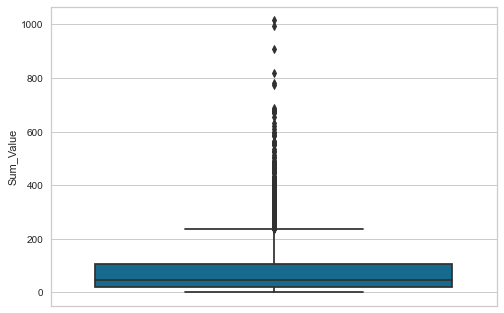

In [32]:
sns.boxplot(y="Sum_Value", data=customer_agg)

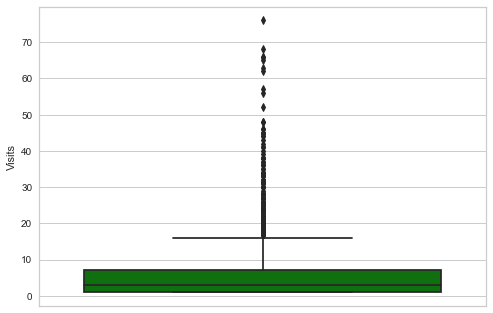

In [33]:
sns.boxplot(y="Visits", data=customer_agg, color="green")

* Judging by our boxplots' appearances, it is needed to remove the outliers.
* At first, let's remove any outliers as far as visits are concerned.

In [34]:
Q1 = customer_agg.groupby('Card_ID')['Visits'].transform('sum').quantile(0.25)
Q3 = customer_agg.groupby('Card_ID')['Visits'].transform('sum').quantile(0.75)

IQR = Q3 - Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
grouped = customer_agg.groupby('Card_ID')['Visits'].transform('sum')
ids = grouped[(grouped > minimum) & (grouped < maximum)].index.get_level_values(0)
customer_agg = customer_agg[customer_agg.index.isin(ids)].copy()

* After removing the outliers (as far as Visits are concerned) we can make a Visits boxplot again to see the result.

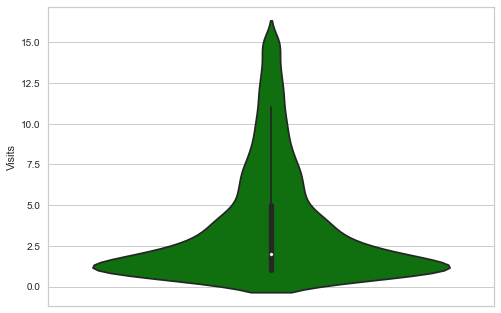

In [35]:
sns.violinplot(y="Visits", data=customer_agg, color="green")

* Things are way better now (judging by the kernel density of the violinplot)!

* Next, we remove Sum_Value outliers.

In [36]:
Q1 = customer_agg.groupby('Card_ID')['Sum_Value'].transform('sum').quantile(0.25)
Q3 = customer_agg.groupby('Card_ID')['Sum_Value'].transform('sum').quantile(0.75)

IQR = Q3 - Q1
minimum = Q1 - 1.5*IQR
maximum = Q3 + 1.5*IQR
grouped = customer_agg.groupby('Card_ID')['Sum_Value'].transform('sum')
ids = grouped[(grouped > minimum) & (grouped < maximum)].index.get_level_values(0)
customer_agg = customer_agg[customer_agg.index.isin(ids)].copy()

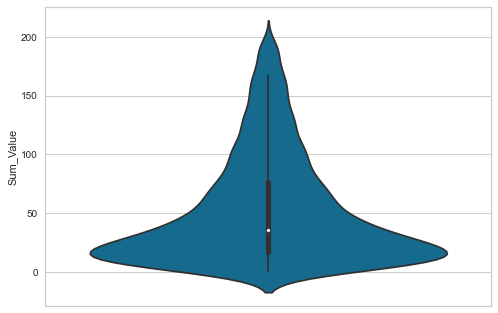

In [37]:
sns.violinplot(y="Sum_Value", data=customer_agg)

* Before clustering, though, we need to know if our data share a common scale.

In [38]:
customer_agg.iloc[:, 1:].describe()

,Sum_Value,Visits
count,3863.000000,3863.000000
mean,52.507477,3.402278
std,46.468607,3.068393
min,0.640000,1.000000
25%,16.728452,1.000000
50%,36.020190,2.000000
75%,76.927909,5.000000
max,196.109083,15.000000


* By taking a glance at the standard variation, we can see that our data need to be scaled. Otherwise, the "Sum_Value" dimension will be the one to determine the results of the clustering, whereas the "Visits" dimension will be overlooked by the K-Means algorithm.

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cust = customer_agg.copy()
scaled_cust[['Sum_Value', 'Visits']] = scaler.fit_transform(scaled_cust[['Sum_Value', 'Visits']])
scaled_cust

,Card_ID,Sum_Value,Visits
0,9160000047700,2.552007,0.846716
1,9160000072177,1.861819,-0.457067
2,9160000108180,0.461441,-0.783012
3,9160000137227,1.660770,0.194825
4,9160000168443,-0.292367,0.194825
...,...,...,...
4394,9164017704649,-0.778421,-0.783012
4395,9164017711777,-0.410643,-0.131121
4396,9164017716109,-1.071345,-0.783012
4397,9164017898218,-0.863402,-0.783012


In [40]:
scaled_cust.describe()

,Sum_Value,Visits
count,3.863000e+03,3.863000e+03
mean,-3.537884e-17,1.236966e-16
std,1.000129e+00,1.000129e+00
min,-1.116328e+00,-7.830122e-01
25%,-7.700609e-01,-7.830122e-01
50%,-3.548508e-01,-4.570665e-01
75%,5.255934e-01,5.207706e-01
max,3.090693e+00,3.780228e+00


* Let's find out the suggested number of clusters with the assistance of the elbow method.

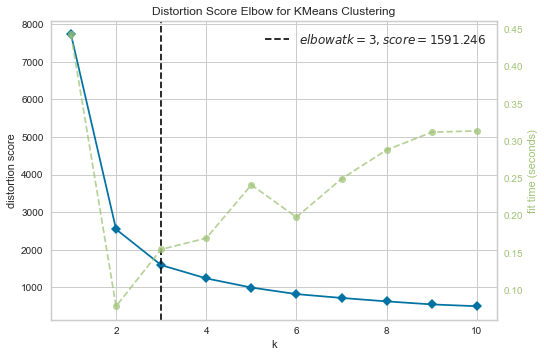

In [41]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=0)
visualizer = KElbowVisualizer(kmeans, k=(1,11))

visualizer.fit(scaled_cust.iloc[:, 1:3])
visualizer.show()

* Despite the elbow results, we chose "5" as the ideal number of clusters, because those results are more reasonable.

In [42]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=300, max_iter=1000, init='k-means++').fit(scaled_cust.iloc[:, 1:3])
customer_agg['Cluster'] = kmeans.labels_

* Now, let's plot our clusters!

<Figure size 100000x50000 with 0 Axes>

<Figure size 576x396 with 0 Axes>

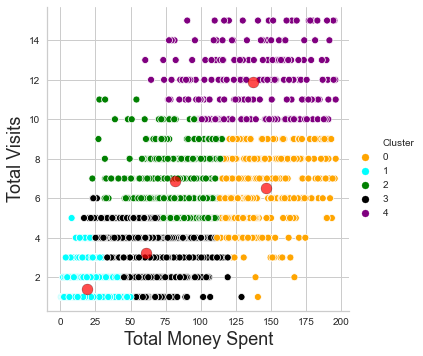

In [43]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

figure(num=1, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns_plot = sns.relplot(x='Sum_Value', y='Visits', hue=customer_agg['Cluster'], data=customer_agg, palette=["orange", "cyan", "green", "black", "purple"])
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Total Money Spent', fontsize=18)
plt.ylabel('Total Visits', fontsize=18)
sns_plot.savefig("customer_clustering.png")

* Let's give names to our clusters (the same names have been used in the presentation)

In [44]:
customer_clusters_names_map = {
    0: 'High-Spenders',
    1: 'Dormant',
    2: 'Balanced',
    3: 'Product-Selective',
    4: 'Most loyal'
}
customer_agg['Cluster_Name'] = customer_agg.Cluster.apply(lambda x: customer_clusters_names_map[x])
customer_agg.head(5)

,Card_ID,Sum_Value,Visits,Cluster,Cluster_Name
0,9160000047700,171.080323,6,0,High-Spenders
1,9160000072177,139.012415,2,0,High-Spenders
2,9160000108180,73.947205,1,3,Product-Selective
3,9160000137227,129.671166,4,0,High-Spenders
4,9160000168443,38.923346,4,3,Product-Selective


* Let's see now, the percentage of total customers that belong to each cluster.

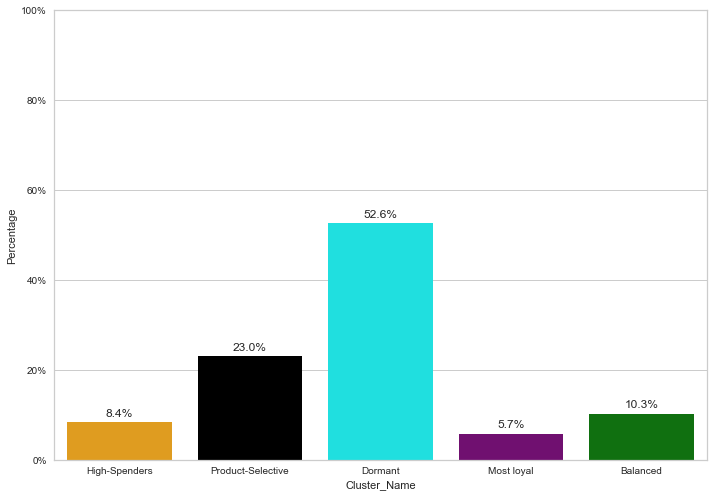

In [45]:
import matplotlib.ticker as mtick
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x="Cluster_Name", y="Cluster", data=customer_agg, estimator=lambda x: len(x) / len(customer_agg) * 100,
                 palette=["orange", "black", "cyan", "purple", "green"])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f') + '%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax.set(ylabel="Percentage")
ax.set(ylim=(0, 100))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.figure.savefig('customer_clusters_percentageplot.png', dpi=145)

* It is apparent that the cyan cluster (the Dormants) is the most dominant despite the fact that in the cluster plot it takes little space!

* Let's also explore the total money that each cluster contributes to our total.

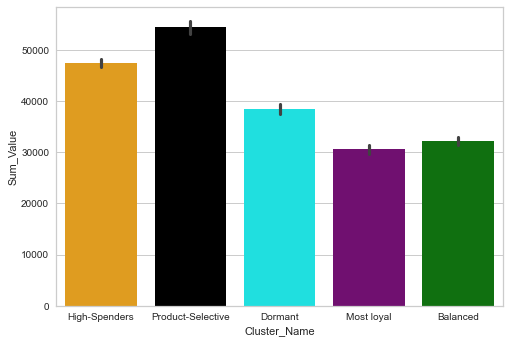

In [46]:
sns.barplot(x="Cluster_Name", y="Sum_Value", data=customer_agg, estimator=sum, palette=["orange", "black", "cyan", "purple", "green"])

* Finally, let's see the amount of money an average person contributes from each cluster.

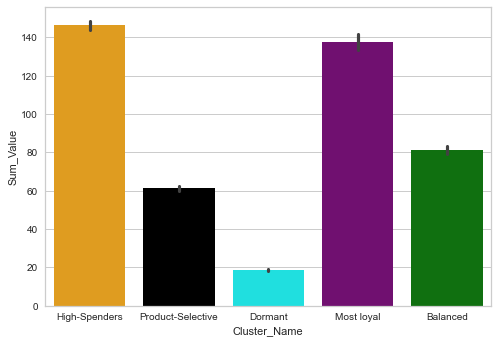

In [47]:
sns.barplot(x="Cluster_Name", y="Sum_Value", data=customer_agg, estimator=np.mean, palette=["orange", "black", "cyan", "purple", "green"])

* It is clear, therefore, that the cyan cluster contributes the less amount of money on average in spite of the fact that its members account for roughly 53% of the total.

* What should the organization do about this though? We shall see!

* At this point, it might be handy to plot the cluster zones, in order to find out the decision boundaries of each cluster.
* This can be done with a Voronoi diagram.

In [48]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor_centroids = kmeans.cluster_centers_
vor_centroids = np.append(vor_centroids, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
vor = Voronoi(vor_centroids)

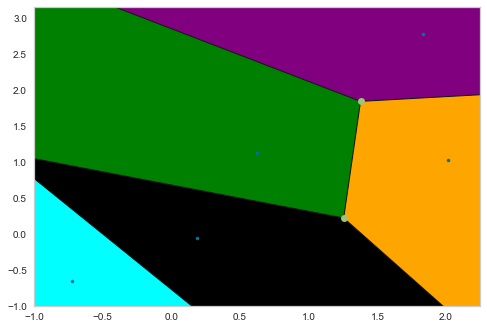

In [49]:
import matplotlib.pyplot as plt

fig = voronoi_plot_2d(vor)

colors = {
    0: 'orange',
    1: 'cyan',
    2: 'green',
    3: 'black',
    4: 'purple'
}

for j in range(5):
    region = vor.regions[vor.point_region[j]]
    polygon = [vor.vertices[i] for i in region]
    plt.fill(*zip(*polygon), colors[j])

plt.xlim([-1, 2.25])
plt.ylim([-1, 3.15])

plt.show()

* The answer to the above question ("What should the organization do?") lies on this diagram. The organization should try to find the "sweet spot" in order to turn "cyan" customers to "black" customers (or even green).

* This could be achieved through cross-selling, for instance.

Finally, there are some qualitative characteristics of each customer segment.

In [50]:
customer_agg = pd.merge(customer_agg,
                       loyalty[['Card_ID', 'Sex', 'HouseholdSize', 'MaritalStatus']],
                       on='Card_ID',
                       how='left')

In [51]:
for i in range(5):
    cluster = customer_agg[customer_agg.Cluster == i]
    print(customer_clusters_names_map[i] + " sex KPI:")
    print(cluster.Sex.value_counts(normalize=True, dropna=False).mul(100).apply("{0:.2f}".format))
    print()
    print(customer_clusters_names_map[i] + " HouseholdSize KPI:")
    print(cluster.HouseholdSize.value_counts(normalize=True, dropna=False).mul(100).apply("{0:.2f}".format))
    print(customer_clusters_names_map[i] + " MaritalStatus KPI:")
    print(cluster.MaritalStatus.value_counts(normalize=True, dropna=False).mul(100).apply("{0:.2f}".format))
    print('-------------------------------------------------------------')

High-Spenders sex KPI:
Female        57.72
Male          29.01
NaN           10.49
Unknown        2.47
Fake Names     0.31
Name: Sex, dtype: object

High-Spenders HouseholdSize KPI:
1      56.17
4      12.04
NaN    10.49
3       9.57
2       7.41
5       2.47
6       1.54
7       0.31
Name: HouseholdSize, dtype: object
High-Spenders MaritalStatus KPI:
NaN                77.78
Married            18.83
Single (Alone)      2.47
Widow/Widower       0.62
Single (Family)     0.31
Name: MaritalStatus, dtype: object
-------------------------------------------------------------
Dormant sex KPI:
Female     53.47
Male       29.81
NaN        12.44
Unknown     4.28
Name: Sex, dtype: object

Dormant HouseholdSize KPI:
1      53.52
NaN    12.44
3      10.72
4      10.18
2       8.85
5       2.80
6       1.03
7       0.20
8       0.10
10      0.05
22      0.05
23      0.05
Name: HouseholdSize, dtype: object
Dormant MaritalStatus KPI:
NaN                82.29
Married            14.12
Single (Alone)    

# TEST ANOTHER CLUSTERING IDEA


In [52]:
customer_agg2 = data.groupby('Card_ID').agg({'Sum_Value': 'sum', 'Basket_ID': lambda x: len(x.unique()), 'Barcode': lambda x: len(x.unique())})
customer_agg2 = customer_agg2.rename(columns={'Basket_ID': 'Visits', 'Barcode': 'Variety'})
#customer_agg2['Sum_Units'] = customer_agg2['Sum_Units'] / customer_agg2['Visits']
#customer_agg2['Sum_Value'] = customer_agg2['Sum_Value'] / customer_agg2['Visits']
#customer_agg2 = customer_agg2.rename(columns={'Sum_Units': 'Mean_Units', 'Sum_Value': 'Mean_Value'})
customer_agg2

,Sum_Value,Visits,Variety
Card_ID,,,
9160000047700,171.080323,6,32
9160000072177,139.012415,2,20
9160000108180,73.947205,1,1
9160000137227,129.671166,4,38
9160000168443,38.923346,4,17
...,...,...,...
9164017704649,16.340015,1,6
9164017711777,33.427939,3,16
9164017716109,2.730007,1,1


In [53]:
customer_agg2 = customer_agg2[customer_agg2.Visits < 14].copy()
customer_agg2 = customer_agg2[customer_agg2.Sum_Value < 300]
customer_agg2 = customer_agg2[customer_agg2.Variety < 45]

In [54]:
scaler2 = StandardScaler()
scaled_cust2 = customer_agg2.copy()
scaled_cust2[['Sum_Value', 'Visits', 'Variety']] = scaler2.fit_transform(scaled_cust2[['Sum_Value', 'Visits', 'Variety']])
scaled_cust2.iloc[:, 0:]

,Sum_Value,Visits,Variety
Card_ID,,,
9160000047700,3.303995,1.327719,1.514960
9160000072177,2.473100,-0.337232,0.451736
9160000108180,0.787231,-0.753470,-1.231703
9160000137227,2.231064,0.495243,2.046572
9160000168443,-0.120254,0.495243,0.185930
...,...,...,...
9164017704649,-0.705398,-0.753470,-0.788692
9164017711777,-0.262642,0.079005,0.097328
9164017716109,-1.058040,-0.753470,-1.231703


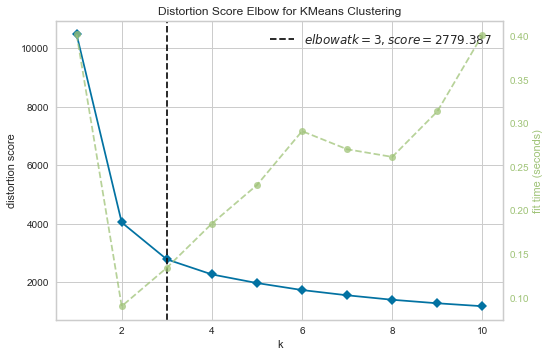

In [55]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans2 = KMeans(random_state=0)
visualizer2 = KElbowVisualizer(kmeans2, k=(1,11))

visualizer2.fit(scaled_cust2.iloc[:, 0:])
visualizer2.show()

In [56]:
kmeans2 = KMeans(n_clusters=4, random_state=0, n_init=300, max_iter=1000, init='k-means++').fit(scaled_cust2.iloc[:, 0:])
customer_agg2['Cluster'] = kmeans2.labels_

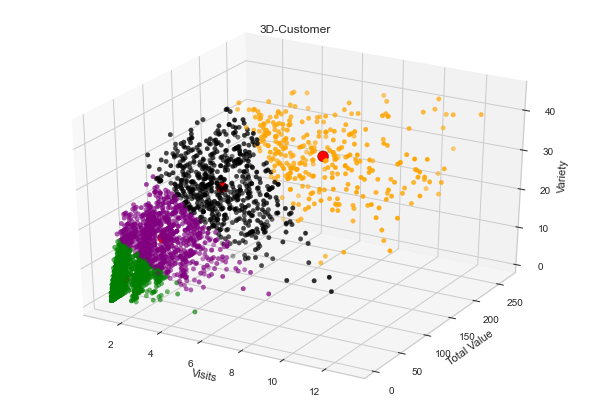

In [57]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# palette=["purple", "black", "orange", "cyan", "green"]

colors = {
    0: 'purple',
    1: 'black',
    2: 'green',
    3: 'orange',
}

fig = pyplot.figure()
ax = Axes3D(fig)

centers2 = scaler2.inverse_transform(kmeans2.cluster_centers_)

ax.scatter(ys=customer_agg2['Sum_Value'], xs=customer_agg2['Visits'], zs=customer_agg2['Variety'], c=[colors[i] for i in list(customer_agg2['Cluster'])])
ax.scatter(xs=centers2[:, 1], zs=centers2[:, 2], ys=centers2[:, 0], c='red', edgecolor='black', s=120, alpha=1)

pyplot.title('3D-Customer')
pyplot.xlabel('Visits')
pyplot.ylabel('Total Value')
ax.set_zlabel('Variety')
ax.figure.savefig('3d_cust.png')
pyplot.show()

Text(31.539681640625005, 0.5, 'Variety')

<Figure size 100000x50000 with 0 Axes>

<Figure size 576x396 with 0 Axes>

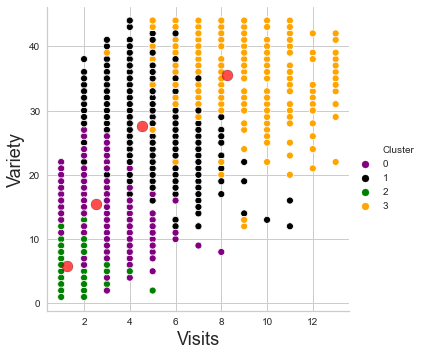

In [58]:
figure(num=2, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns_plot = sns.relplot(x='Visits', y='Variety', hue=customer_agg2['Cluster'], data=customer_agg2, palette=["purple", "black", "green", 'orange'])
plt.scatter(centers2[:, 1], centers2[:, 2], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Visits', fontsize=18)
plt.ylabel('Variety', fontsize=18)

Text(31.539681640625005, 0.5, 'Variety')

<Figure size 100000x50000 with 0 Axes>

<Figure size 576x396 with 0 Axes>

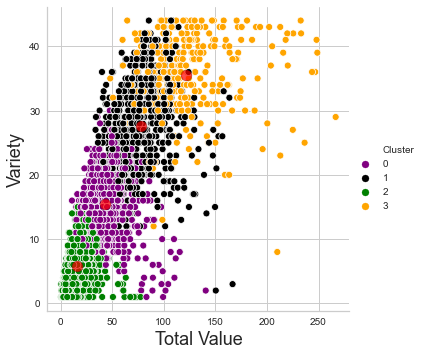

In [59]:
figure(num=3, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns_plot = sns.relplot(x='Sum_Value', y='Variety', hue=customer_agg2['Cluster'], data=customer_agg2, palette=["purple", "black", "green", 'orange'])
centers2 = scaler2.inverse_transform(kmeans2.cluster_centers_)
plt.scatter(centers2[:, 0], centers2[:, 2], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Total Value', fontsize=18)
plt.ylabel('Variety', fontsize=18)

Text(31.48396875000001, 0.5, 'Visits')

<Figure size 100000x50000 with 0 Axes>

<Figure size 576x396 with 0 Axes>

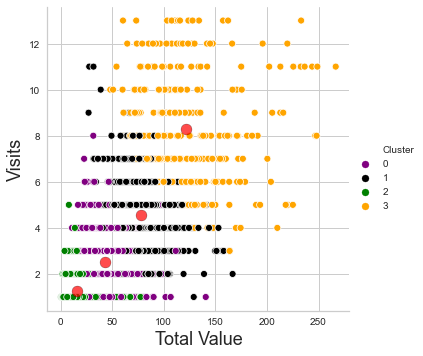

In [60]:
figure(num=4, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns_plot = sns.relplot(x='Sum_Value', y='Visits', hue=customer_agg2['Cluster'], data=customer_agg2, palette=["purple", "black", "green", 'orange'])
centers2 = scaler2.inverse_transform(kmeans2.cluster_centers_)
plt.scatter(centers2[:, 0], centers2[:, 1], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Total Value', fontsize=18)
plt.ylabel('Visits', fontsize=18)

## "Differentiation during the Holy Week" analysis

* At first, we need to split the dataset into two parts: Holy Week purchases and regular period purchases.

In [61]:
holy_week = data[data['Date'].between('41358', '41363')]
holy_week.head(5)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
10,1097560314,41362,520139564361,1,2.389993,9163005877594
25,1097561680,41362,520110616312,1,1.720000,9163001864895
29,1098025026,41363,260670100000,1,11.559501,9164013170103
35,1097579702,41362,520423932241,1,0.850007,9164009659896
61,1096376107,41359,871170076360,1,3.549993,9164007489907


In [62]:
normal = data[~data['Date'].between('41358', '41363')]
normal.head(5)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9160003751260
1,1103853519,41381,520139501183,1,5.349993,9164001986624
2,1092750793,41346,520423907421,6,1.740015,9164012915385
3,1106160983,41388,211069400000,1,0.749817,9162005811409
4,1108695491,41395,520286400380,2,0.600000,9161003517351


* Now let's aggregate the results for each period by customer.

In [63]:
customer_agg_hw = holy_week.groupby('Card_ID').agg({'Sum_Value': 'sum', 'Basket_ID': lambda x: len(x.unique())})
customer_agg_hw = customer_agg_hw.rename(columns={'Basket_ID': 'Visits'})
customer_agg_hw['Week'] = 'Holy Week'

In [64]:
customer_agg_hw = customer_agg_hw.reset_index()
customer_agg_hw.head(5)

,Card_ID,Sum_Value,Visits,Week
0,9160000047700,3.720176,1,Holy Week
1,9160000137227,22.250065,1,Holy Week
2,9160000207388,40.230902,1,Holy Week
3,9160000253859,31.771798,1,Holy Week
4,9160000259042,32.473279,1,Holy Week


* Note: _Since the normal period includes 7 weeks, we need to aggregate means and not sums (totals), because we need to compare the average non-holidays week to the Holy Week._

In [65]:
customer_agg_nm = normal.groupby('Card_ID').agg({'Sum_Value': lambda x: x.sum() / 7, 'Basket_ID': lambda x: (len(x.unique()) / 7)})
customer_agg_nm = customer_agg_nm.rename(columns={'Basket_ID': 'Visits'})
customer_agg_nm['Week'] = 'Normal'

In [66]:
customer_agg_nm = customer_agg_nm.reset_index()
customer_agg_nm.head(5)

,Card_ID,Sum_Value,Visits,Week
0,9160000047700,23.908592,0.714286,Normal
1,9160000072177,19.858916,0.285714,Normal
2,9160000108180,10.563886,0.142857,Normal
3,9160000137227,15.345871,0.428571,Normal
4,9160000168443,5.560478,0.571429,Normal


* In order to make comparisons, we need those customers that have shopped **both** during a non-holidays week and during the Holy Week. So, we obtain the intersection of the two datasets.

In [67]:
non_hw = customer_agg_nm.Card_ID.unique().tolist()
hw = customer_agg_hw.Card_ID.unique().tolist()
intersection = set(hw).intersection(non_hw)
customer_agg_hw = customer_agg_hw[customer_agg_hw.Card_ID.isin(intersection)]
customer_agg_nm = customer_agg_nm[customer_agg_nm.Card_ID.isin(intersection)]

In [68]:
intersection_df = customer_agg_hw.append(customer_agg_nm)
intersection_df.head(5)

,Card_ID,Sum_Value,Visits,Week
0,9160000047700,3.720176,1.0,Holy Week
1,9160000137227,22.250065,1.0,Holy Week
2,9160000207388,40.230902,1.0,Holy Week
3,9160000253859,31.771798,1.0,Holy Week
4,9160000259042,32.473279,1.0,Holy Week


* Before doing any analysis, we shall create a box plot of Sum_Values for each period to spot any outliers.

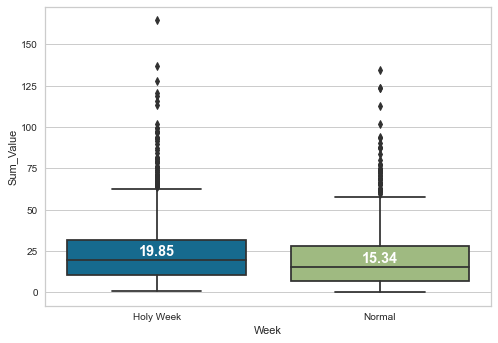

In [69]:
box_plot = sns.boxplot(x="Week", y="Sum_Value", data=intersection_df)
medians = intersection_df.groupby(['Week'])['Sum_Value'].median()
vertical_offset = intersection_df['Sum_Value'].median() * 0.15

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,np.around(medians[xtick], 2), 
            horizontalalignment='center',size='large',color='w',weight='semibold')

* We move on with the removal of the outliers

In [70]:
Q1 = intersection_df['Sum_Value'].quantile(0.25)
Q3 = intersection_df['Sum_Value'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (intersection_df['Sum_Value'] >= Q1 - 1.5 * IQR) & (intersection_df['Sum_Value'] <= Q3 + 1.5 *IQR)
intersection_df = intersection_df.loc[filter].copy()  

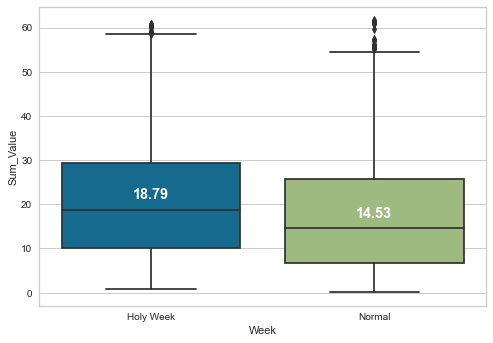

In [71]:
box_plot = sns.boxplot(x="Week", y="Sum_Value", data=intersection_df)
medians = intersection_df.groupby(['Week'])['Sum_Value'].median()
vertical_offset = intersection_df['Sum_Value'].median() * 0.15

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,np.around(medians[xtick], 2), 
            horizontalalignment='center',size='large',color='w',weight='semibold')

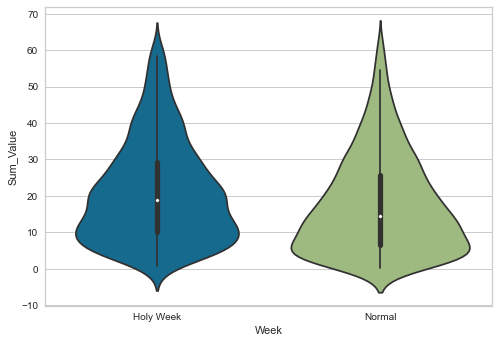

In [72]:
sns.violinplot(x="Week", y="Sum_Value", data=intersection_df)

* Our data are much better now and we can go on with our analysis.

* Let's take a quick glance, thus, at how much people spent on Holy Week vs The average non-holidays week.

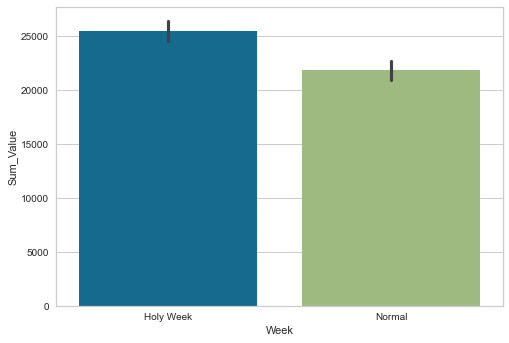

In [73]:
sns.barplot(x='Week', y='Sum_Value', data=intersection_df, estimator=sum)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_cust_hw = customer_agg_hw.copy()
scaled_cust_hw[['Sum_Value', 'Visits']] = scaler.fit_transform(scaled_cust_hw[['Sum_Value', 'Visits']])

* Let's try something now! We will scale the data of the average **non-holidays week** and then run a clustering algorithm.

In [75]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaled_cust_nm = customer_agg_nm.copy()
scaled_cust_nm[['Sum_Value', 'Visits']] = scaler2.fit_transform(scaled_cust_nm[['Sum_Value', 'Visits']])
scaled_cust_nm

,Card_ID,Sum_Value,Visits,Week
0,9160000047700,0.237922,-0.510726,Normal
3,9160000137227,-0.251982,-0.737259,Normal
5,9160000207388,-0.103292,-0.170928,Normal
8,9160000253859,-0.456185,-0.850525,Normal
11,9160000259042,-0.336649,-0.623993,Normal
...,...,...,...,...
4214,9164014017445,1.284416,1.075002,Normal
4215,9164014017452,0.144817,0.508670,Normal
4216,9164014017469,-0.232123,0.282138,Normal
4220,9164014017506,-0.853141,-0.397460,Normal


In [76]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init=300, max_iter=1000, init='k-means++').fit(scaled_cust_nm.iloc[:, 1:3])
customer_agg_nm['Cluster'] = kmeans.labels_

* Below, we can see the results of the clustering on a plot.

<Figure size 100000x50000 with 0 Axes>

<Figure size 576x396 with 0 Axes>

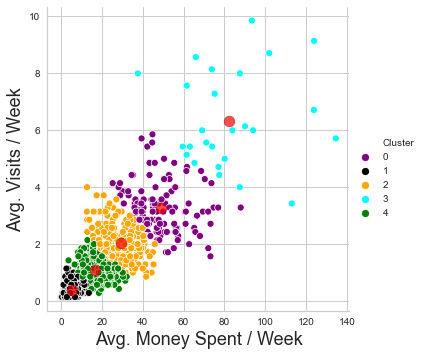

In [77]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

figure(num=1, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns.set_style("whitegrid")
sns_plot = sns.relplot(x='Sum_Value', y='Visits', hue=customer_agg_nm['Cluster'], data=customer_agg_nm, palette=["purple", "black", "orange", "cyan", "green"])
centers = scaler2.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Avg. Money Spent / Week', fontsize=18)
plt.ylabel('Avg. Visits / Week', fontsize=18)
sns_plot.savefig('normal_week.png', dpi=145)

* Here comes the tricky part. We only need the centroids of those clusters. So let's keep only them!

<Figure size 100000x50000 with 0 Axes>

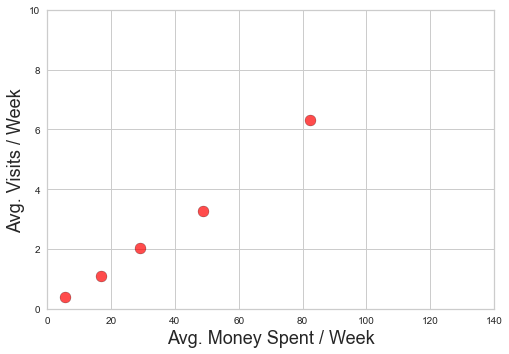

In [78]:
figure(num=4, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns.set_style("whitegrid")
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Avg. Money Spent / Week', fontsize=18)
plt.ylabel('Avg. Visits / Week', fontsize=18)
plt.ylim(0, 10)
plt.xlim(0, 140)
sns_plot.savefig('normal_week.png', dpi=145)

* Now, we are going to plot our **Holy-Week** data on those centroids.

* Why? Because we want to find out how people's behavior differentiates on holidays. 

* We can do this by using those centroids for a new clustering, while using the Holy Week data.

In [79]:
from scipy.spatial import distance
array = distance.cdist(scaled_cust_hw.iloc[:, 1:3].values, np.array(kmeans.cluster_centers_), metric='euclidean')
customer_agg_hw['Cluster_BW'] = array.argmin(1)

In [80]:
customer_agg_hw = pd.merge(customer_agg_hw,
                          customer_agg_nm[['Card_ID', 'Cluster']],
                          on='Card_ID',
                          how='inner')

* Here are the results!

<Figure size 100000x50000 with 0 Axes>

<Figure size 576x396 with 0 Axes>

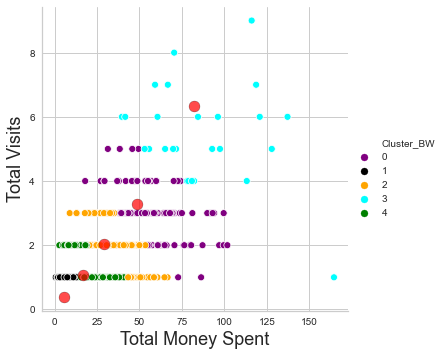

In [81]:
figure(num=1, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns_plot = sns.relplot(x='Sum_Value', y='Visits', hue=customer_agg_hw['Cluster_BW'], data=customer_agg_hw, palette=["purple", "black", "orange", "cyan", "green"])
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Total Money Spent', fontsize=18)
plt.ylabel('Total Visits', fontsize=18)
sns_plot.savefig('customer_migration.png')

* Now, we can use each person's **PREVIOUS** colour in order to show their previous cluster. Of course, the plot will make no sense, but that is the point: to show how much people change their behaviors.

<Figure size 100000x50000 with 0 Axes>

<Figure size 576x396 with 0 Axes>

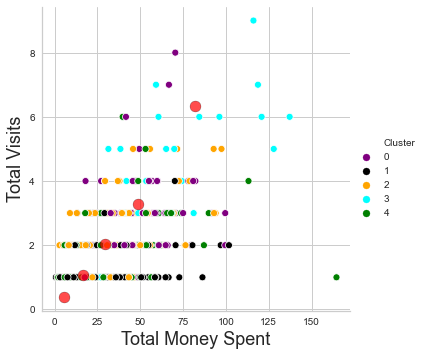

In [82]:
figure(num=1, figsize=(1000, 500), dpi=100, facecolor='w', edgecolor='k')
fig = plt.figure()
sns_plot = sns.relplot(x='Sum_Value', y='Visits', hue=customer_agg_hw['Cluster'], data=customer_agg_hw, palette=["purple", "black", "orange", "cyan", "green"])
plt.scatter(centers[:, 0], centers[:, 1], 
            c='red', edgecolor='black', s=120, alpha=0.7)
plt.xlabel('Total Money Spent', fontsize=18)
plt.ylabel('Total Visits', fontsize=18)
sns_plot.savefig('customer_migration.png')

In [83]:
matrix = customer_agg_hw.pivot_table(values='Card_ID', index='Cluster', columns='Cluster_BW', aggfunc='count', fill_value=0)
matrix

Cluster_BW,0,1,2,3,4
Cluster,,,,,
0,36,15,40,6,25
1,14,196,47,0,193
2,26,61,74,5,101
3,10,1,4,11,1
4,18,159,60,4,160


In [84]:
pd.crosstab(customer_agg_hw.Cluster, customer_agg_hw.Cluster_BW, values=customer_agg_hw.Card_ID, aggfunc='count', normalize='index') * 100

Cluster_BW,0,1,2,3,4
Cluster,,,,,
0,29.508197,12.295082,32.786885,4.918033,20.491803
1,3.111111,43.555556,10.444444,0.000000,42.888889
2,9.737828,22.846442,27.715356,1.872659,37.827715
3,37.037037,3.703704,14.814815,40.740741,3.703704
4,4.488778,39.650873,14.962594,0.997506,39.900249


In [85]:
pd.crosstab(customer_agg_hw.Cluster, customer_agg_hw.Cluster_BW, values=customer_agg_hw.Card_ID, aggfunc='count', normalize='columns') * 100

Cluster_BW,0,1,2,3,4
Cluster,,,,,
0,34.615385,3.472222,17.777778,23.076923,5.208333
1,13.461538,45.370370,20.888889,0.000000,40.208333
2,25.000000,14.120370,32.888889,19.230769,21.041667
3,9.615385,0.231481,1.777778,42.307692,0.208333
4,17.307692,36.805556,26.666667,15.384615,33.333333


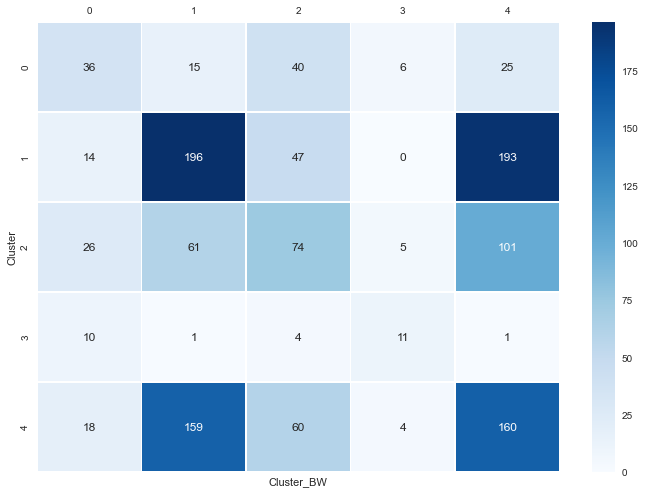

In [86]:
import matplotlib.pyplot as plt
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(matrix, annot=True, linewidths=.5, fmt='g', cmap='Blues')
ax.xaxis.set_ticks_position('top')

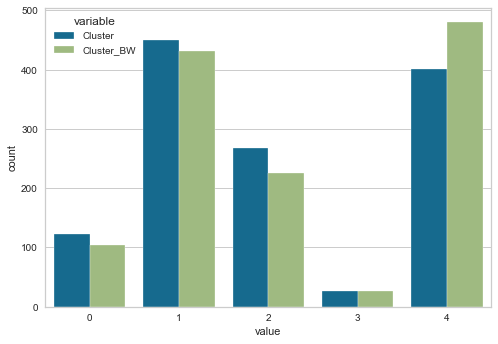

In [87]:
sns_countplot = sns.countplot(x="value", hue="variable", data=pd.melt(customer_agg_hw[['Cluster', 'Cluster_BW']]))